# PHYS 434 - HW2

### Thomas K Waters

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import quad
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (15,10) #Setting future plot sizes

#### 1. A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

The first part is easy. This is an AND situation, so I will use $P(A \cap B) = P(A)P(B)$

In [1]:
P_A = 1/6
P_B = 1/6
P_snakeyes = P_A*P_B

In [2]:
P_snakeyes

0.027777777777777776

For rolling sevens, we have the following options: 1+6, 2+5, 3+4, 4+3, 5+2, and 6+1. This problem can be simply thought of as the number of outcomes that yeild 7 divided by the total number of possible outcomes (36).

In [9]:
N_possible = 6
N_total = 36
P_sevens = N_possible / N_total

In [10]:
P_sevens

0.16666666666666666

The ratio of these probabilities is:

In [11]:
P_snakeyes/P_sevens

0.16666666666666666

#### 2. Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

$P_{A+B}(x) = \int P_A(z)P_B(x-z) \,dz = P_A(x)\ast P_B(x)$

In [103]:
A = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
B = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [179]:
probabilities = np.convolve(A,B)

In [180]:
probabilities

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [136]:
sums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

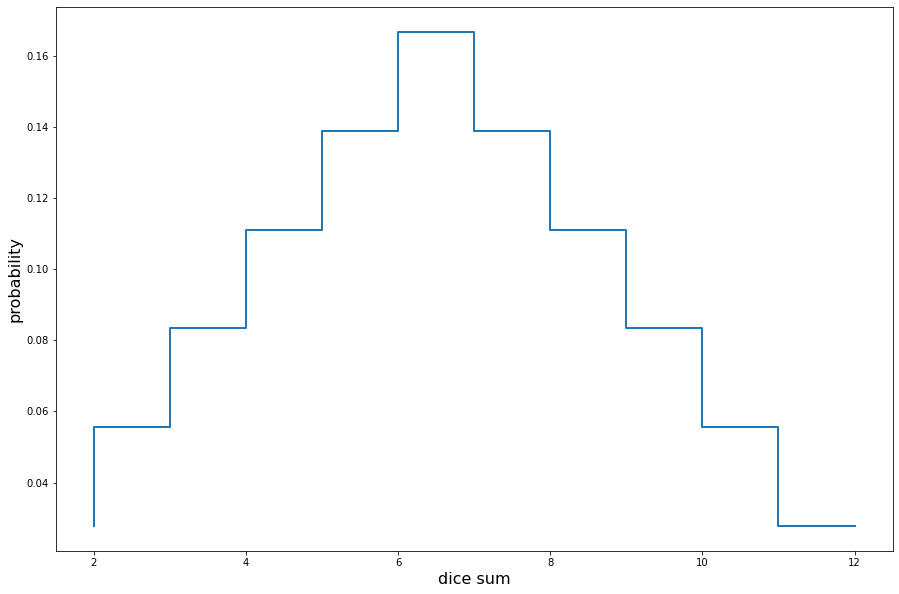

In [176]:
plt.step(sums, convoluion, linewidth = 2)
plt.ylabel('probability', size = 16)
plt.xlabel('dice sum', size = 16);

#### 3. Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [187]:
mean = np.sum(sums@probabilities)
variance = np.sum(probabilities@(sums-mean)**2)

In [188]:
mean, variance

(7.0, 5.833333333333333)

#### 4. Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [112]:
D1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D4 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D5 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D6 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D7 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D8 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D9 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
D10 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [115]:
C1 = np.convolve(D1, D2)
C2 = np.convolve(C1, D3)
C3 = np.convolve(C2, D4)
C4 = np.convolve(C3, D5)
C5 = np.convolve(C4, D6)
C6 = np.convolve(C5, D7)
C7 = np.convolve(C6, D8)
C8 = np.convolve(C7, D9)
C9 = np.convolve(C8, D10)

In [208]:
averages = np.arange(10, 61, 1)/10

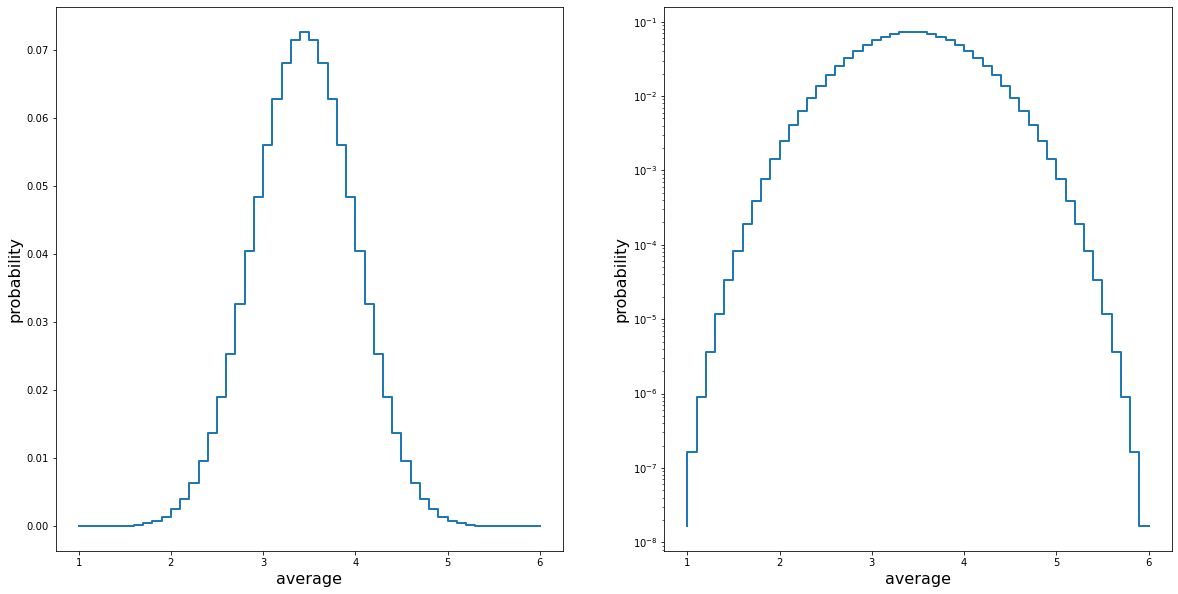

In [209]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].set_xlabel('average', size = 16)
ax[0].set_ylabel('probability', size = 16)
ax[0].step(averages, C9, linewidth = 2)
ax[1].set_xlabel('average', size = 16)
ax[1].set_ylabel('probability', size = 16)
ax[1].step(averages, C9, linewidth = 2)
ax[1].set_yscale('log')

In [213]:
mean2 = np.sum(averages*C9)
variance2 =  C9@(averages-mean2)**2

In [214]:
mean2, variance2

(3.4999999999999982, 0.2916666666666665)

#### 5. Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [216]:
#creating 2 normal distributions with the same standard deviation.
data = stats.norm.rvs(loc = 0, scale = 1, size = 100000) 
data2 = stats.norm.rvs(loc = 0, scale = 1, size = 100000)

##### Averaging Gaussians

In [217]:
avgdata = (data+data2)/len(data)

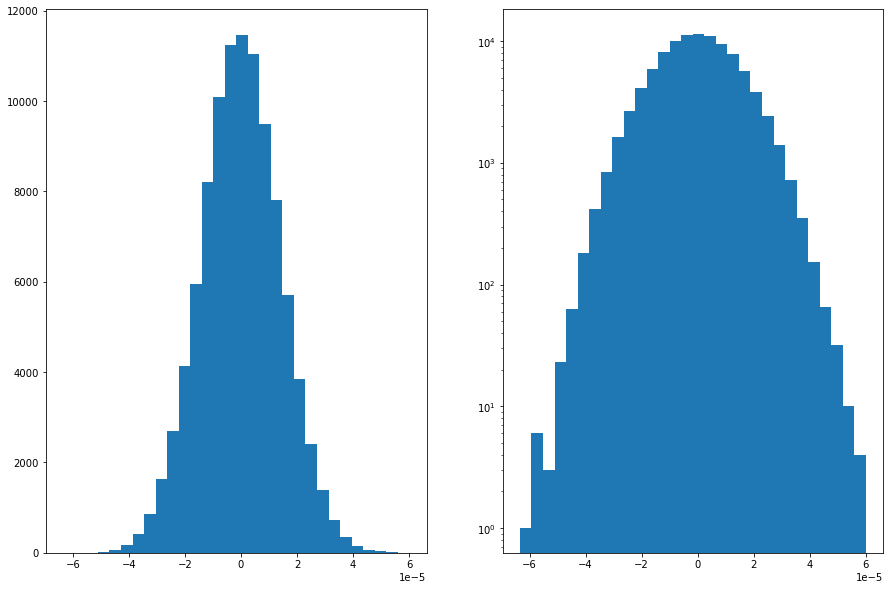

In [218]:
fig, ax = plt.subplots(1,2)
ax[0].hist(avgdata, bins = 30)
ax[1].hist(avgdata, bins = 30)
ax[1].set_yscale('log');

Still Gaussian

In [219]:
std_init = np.std(data)
std_avg = np.std(avgdata)

In [220]:
std_init, std_avg

(1.001729173485291, 1.4128321281112145e-05)

##### Summing Gaussians

In [221]:
sumdata = data+data2

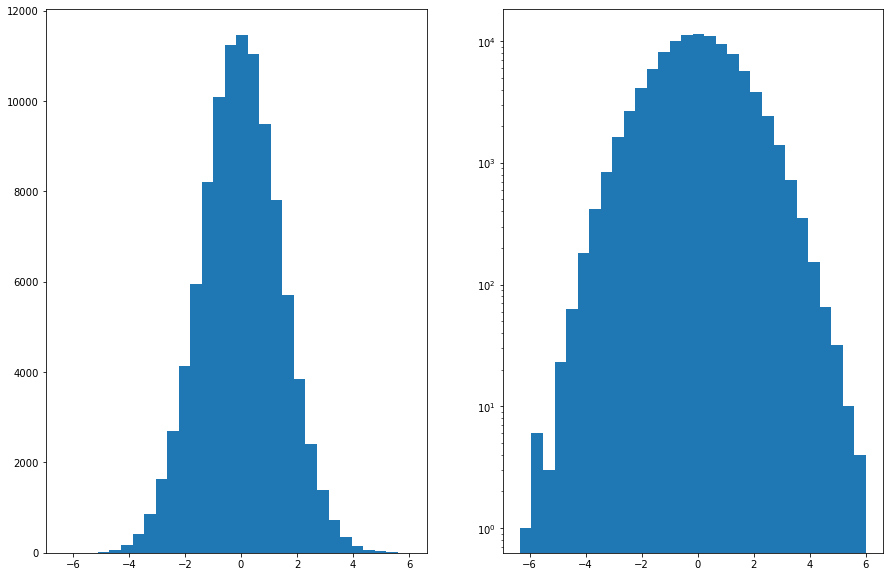

In [222]:
fig, ax = plt.subplots(1,2)
ax[0].hist(sumdata, bins = 30)
ax[1].hist(sumdata, bins = 30)
ax[1].set_yscale('log');

Also still Gaussian!

In [223]:
std_sum = np.std(sumdata)

In [224]:
std_init, std_sum

(1.001729173485291, 1.4128321281112146)

When averaging the data, we see the standard deviation decreases dramatically. When summming the data, however, we see the standard deviation increase. Therefore, by integrating a signal over time we are decreasing standard deviation on our measurement and thus the uncertainty on the measurement.